In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
cd C:\Users\Sanjeevees\Desktop\mid

C:\Users\Sanjeevees\Desktop\mid


In [4]:
bwght = pd.read_csv('hprice1.csv')

In [22]:
bwght

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.000,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.000,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.000,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.000,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.000,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630
5,466.275,414.5,5,8566,2754,1,6.144775,6.027073,9.055556,7.920810
6,332.500,367.8,3,9000,2067,1,5.806640,5.907539,9.104980,7.633853
7,315.000,300.2,3,6210,1731,1,5.752573,5.704449,8.733916,7.456455
8,206.000,236.1,3,6000,1767,0,5.327876,5.464255,8.699514,7.477038
9,240.000,256.3,3,2892,1890,0,5.480639,5.546349,7.969704,7.544332


In [ ]:
# Creating Summary of the Data

In [5]:
def sstats(data):
    df = (data.mean(),data.std(),data.min(),data.max(),data.median(),data.isnull().sum())
    df = pd.concat(df,axis=1)
    df.columns = ['mean','std','min','max','median','is null']
    return(df)
sstats(bwght)

,mean,std,min,max,median,is null
price,293.546034,102.713445,111.000000,725.000000,265.500000,0
assess,315.736364,95.314437,198.700000,708.600000,290.200000,0
bdrms,3.568182,0.841393,2.000000,7.000000,3.000000,0
lotsize,9019.863636,10174.150414,1000.000000,92681.000000,6430.000000,0
sqrft,2013.693182,577.191583,1171.000000,3880.000000,1845.000000,0
colonial,0.693182,0.463816,0.000000,1.000000,1.000000,0
lprice,5.633180,0.303573,4.709530,6.586172,5.581613,0
lassess,5.717994,0.262113,5.291796,6.563291,5.670566,0
llotsize,8.905105,0.544060,6.907755,11.436920,8.768719,0
lsqrft,7.572610,0.258688,7.065613,8.263591,7.520231,0


In [ ]:
# Using simple OLS on predicting log of price with respect to lot size and log of sqrft area

In [6]:
Xdata = pd.concat((bwght['llotsize'],bwght['lsqrft']),axis=1)
Xdata = sm.add_constant(Xdata)
model1 = smf.OLS(bwght['lprice'],Xdata).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     74.04
Date:                Mon, 30 Jul 2018   Prob (F-statistic):           2.41e-19
Time:                        16:49:27   Log-Likelihood:                 24.927
No. Observations:                  88   AIC:                            -43.85
Df Residuals:                      85   BIC:                            -36.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6401      0.602     -2.725      0.008      -2.837      -0.443
llotsize       0.1685      0.038      4.380      0.000       0.092       0.245
lsqrft         0.7624      0.081      9.425      0.000       0.602       0.923
==============================================================================
Omnibus:                        9.606   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               23.727
Skew:                          -0.006   Prob(JB):                     7.04e-06
Kurtosis:                       5.544   Cond. No.                         360.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# grouping components with respect to bedrooms and finding the mean
bwght.groupby(['bdrms']).mean()

,price,assess,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
bdrms,,,,,,,,,
2,251.250000,292.125000,12802.250000,1572.250000,0.000000,5.517506,5.658681,9.355248,7.333385
3,261.979167,280.602381,6848.857143,1809.928571,0.642857,5.548610,5.623769,8.755052,7.481255
4,285.163667,319.703030,9945.151515,2085.242424,0.787879,5.613984,5.734544,8.917036,7.619867
5,518.003571,507.014286,16135.571429,3024.428571,0.857143,6.205942,6.200701,9.519052,7.997836
6,310.000000,253.600000,5348.000000,1386.000000,1.000000,5.736572,5.535758,8.584478,7.234177
7,477.500000,478.100000,8400.000000,3529.000000,1.000000,6.168564,6.169820,9.035987,8.168770


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt
colormap = {2: 'red', 3: 'green', 4: 'blue', 5: 'orange', 6: 'yellow', 7: 'purple'}
colors = [colormap[x] for x in bwght['bdrms']]

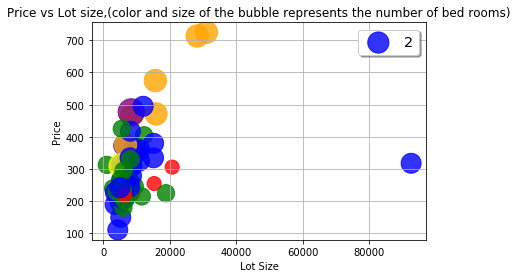

In [21]:
plt.scatter(bwght.lotsize,bwght.price, color=colors, s=bwght.bdrms*100, alpha=0.8) 
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Price vs Lot size,(color and size of the bubble represents the number of bed rooms)')
plt.legend(colormap,loc=1,shadow=True, fontsize='x-large')
plt.grid(True)
plt.show()

In [92]:
bwght['bdrms'] = pd.cut(bwght['bdrms'],[2,3,5,7])
bwght.groupby(['bdrms']).mean()
#finding the shift in prices

,price,assess,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
bdrms,,,,,,,,,
"(2, 3]",261.979167,280.602381,6848.857143,1809.928571,0.642857,5.548610,5.623769,8.755052,7.481255
"(3, 5]",325.910650,352.482500,11028.475000,2249.600000,0.800000,5.717577,5.816121,9.022389,7.686011
"(5, 7]",393.750000,365.850000,6874.000000,2457.500000,1.000000,5.952568,5.852789,8.810232,7.701474


In [110]:
import pandas as pd

In [24]:
df = pd.DataFrame(bwght)
df['diff'] = df.apply(lambda x: x['price'] - x['assess'], axis=1)

In [35]:
#Plotting differnce in price and assess with resepct to bedrooms

Text(0.5,1,'Difference in price with respect to bed rooms')

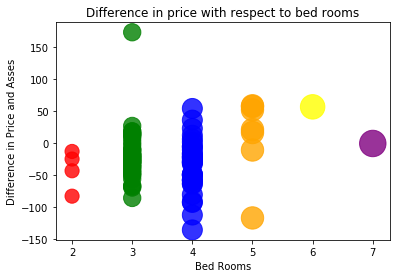

In [36]:
plt.scatter(df.bdrms,df.price-df.assess, color=colors, s=bwght.bdrms*100, alpha=0.8, data=df)
plt.xlabel('Bed Rooms')
plt.ylabel('Difference in Price and Asses')
plt.title('Difference in price with respect to bed rooms')

In [37]:
#Plotting differnce in price and assess with resepct to lotsize

Text(0.5,1,'Difference in price with respect to change in lot size')

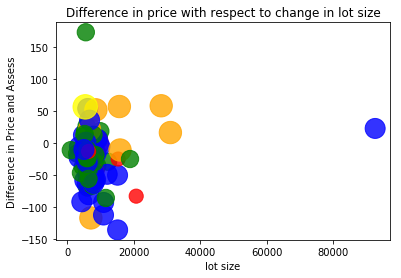

In [38]:
plt.scatter(df.lotsize,df.price-df.assess,color=colors, s=bwght.bdrms*100, alpha=0.8,data=df)
plt.xlabel('lot size')
plt.ylabel('Difference in Price and Assess')
plt.title('Difference in price with respect to change in lot size')

Text(0.5,1,'Difference in price with respect to change in sqrft size')

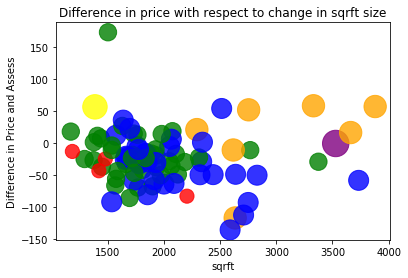

In [34]:
plt.scatter(df.sqrft,df.price-df.assess,color=colors, s=bwght.bdrms*100, alpha=0.8,data=df)
plt.xlabel('sqrft')
plt.ylabel('Difference in Price and Assess')
plt.title('Difference in price with respect to change in sqrft size')